In [3]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importar librerias

In [4]:
# silence warnings
import warnings
warnings.filterwarnings("ignore")
# operating system
import os
# time calculation to track some processes
import time
# numeric and matrix operations
import numpy as np
import pandas as pd

# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# python core library for machine learning and data science
import sklearn
from sklearn import set_config
set_config(transform_output = "pandas")
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from kneed import KneeLocator

import pickle
import webbrowser

# Cargar datos

In [8]:
PATH = "..\CSV\df_final_fechas_14102023.csv"

df= pd.read_csv(PATH)

In [9]:
df

,id,item,category,department,store,store_code,region,date,ventas,event,price,revenue
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-01-30,0,0,12.7414,0.0
1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-06,0,1,12.7414,0.0
2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-13,0,0,12.7414,0.0
3,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-20,0,0,12.7414,0.0
4,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-27,0,0,12.7414,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8354255,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-03-27,17,1,1.2000,20.4
8354256,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-04-03,22,0,1.2000,26.4
8354257,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-04-10,8,0,1.2000,9.6
8354258,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-04-17,0,0,1.2000,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8354260 entries, 0 to 8354259
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id          object 
 1   item        object 
 2   category    object 
 3   department  object 
 4   store       object 
 5   store_code  object 
 6   region      object 
 7   date        object 
 8   ventas      int64  
 9   event       int64  
 10  price       float64
 11  revenue     float64
dtypes: float64(2), int64(2), object(8)
memory usage: 764.9+ MB


In [11]:
df['event'].value_counts()

event
0    7561520
1     792740
Name: count, dtype: int64

# Creación variables para el clúster

In [12]:
df

,id,item,category,department,store,store_code,region,date,ventas,event,price,revenue
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-01-30,0,0,12.7414,0.0
1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-06,0,1,12.7414,0.0
2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-13,0,0,12.7414,0.0
3,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-20,0,0,12.7414,0.0
4,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-27,0,0,12.7414,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8354255,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-03-27,17,1,1.2000,20.4
8354256,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-04-03,22,0,1.2000,26.4
8354257,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-04-10,8,0,1.2000,9.6
8354258,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-04-17,0,0,1.2000,0.0


## Cálculos variables de tiempo (ventas)

In [13]:
df['date'] = pd.to_datetime(df['date'])

# Encuentra el valor mínimo en la columna 'fecha'.
valor_minimo = df['date'].min()

# Resta el valor mínimo de cada fila para obtener la diferencia en tiempo.
df['timedelta'] = df['date'] - valor_minimo

In [14]:
df['semanas'] = df['timedelta'].dt.days/7

df['semanas_consecutivas_ventas'] = df[df['ventas']<=0].groupby(['item'])['semanas'].transform(np.max)

df['semanas_consecutivas_ventas_imputed'] = df.groupby(['item'],group_keys = False)['semanas_consecutivas_ventas'].apply(
    lambda series: series.bfill().ffill()
)

In [15]:
df.isnull().sum()

id                                           0
item                                         0
category                                     0
department                                   0
store                                        0
store_code                                   0
region                                       0
date                                         0
ventas                                       0
event                                        0
price                                        0
revenue                                      0
timedelta                                    0
semanas                                      0
semanas_consecutivas_ventas            4990898
semanas_consecutivas_ventas_imputed       2740
dtype: int64

In [16]:
df.drop('semanas_consecutivas_ventas',axis=1, inplace=True)
df.rename({'semanas_consecutivas_ventas_imputed': 'semanas_consecutivas_ventas'},axis=1,inplace=True)

In [17]:
df.head(3)

,id,item,category,department,store,store_code,region,date,ventas,event,price,revenue,timedelta,semanas,semanas_consecutivas_ventas
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-01-30,0,0,12.7414,0.0,0 days,0.0,273.0
1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-06,0,1,12.7414,0.0,7 days,1.0,273.0
2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-13,0,0,12.7414,0.0,14 days,2.0,273.0


Remplazamos nulos a 273 (máximo de semanas), ya que en este caso los valores nulos, indican que han tenido ventas siempre y por lo tanto el valor de la última semana sin ventas debe ser el total de semanas, para indicar que nunca ha tenido 0 ventas

In [18]:
df.isnull().sum()

id                                0
item                              0
category                          0
department                        0
store                             0
store_code                        0
region                            0
date                              0
ventas                            0
event                             0
price                             0
revenue                           0
timedelta                         0
semanas                           0
semanas_consecutivas_ventas    2740
dtype: int64

In [19]:
df[df['semanas_consecutivas_ventas'].isnull()]

,id,item,category,department,store,store_code,region,date,ventas,event,price,revenue,timedelta,semanas,semanas_consecutivas_ventas
7924080,SUPERMARKET_3_668_BOS_1,SUPERMARKET_3_668,SUPERMARKET,SUPERMARKET_3,South_End,BOS_1,Boston,2011-01-30,9,0,1.776,15.984,0 days,0.0,NaN
7924081,SUPERMARKET_3_668_BOS_1,SUPERMARKET_3_668,SUPERMARKET,SUPERMARKET_3,South_End,BOS_1,Boston,2011-02-06,23,1,1.776,40.848,7 days,1.0,NaN
7924082,SUPERMARKET_3_668_BOS_1,SUPERMARKET_3_668,SUPERMARKET,SUPERMARKET_3,South_End,BOS_1,Boston,2011-02-13,17,0,1.776,30.192,14 days,2.0,NaN
7924083,SUPERMARKET_3_668_BOS_1,SUPERMARKET_3_668,SUPERMARKET,SUPERMARKET_3,South_End,BOS_1,Boston,2011-02-20,19,0,1.776,33.744,21 days,3.0,NaN
7924084,SUPERMARKET_3_668_BOS_1,SUPERMARKET_3_668,SUPERMARKET,SUPERMARKET_3,South_End,BOS_1,Boston,2011-02-27,15,0,1.776,26.640,28 days,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7926815,SUPERMARKET_3_668_PHI_3,SUPERMARKET_3_668,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-03-27,63,1,2.016,127.008,1883 days,269.0,NaN
7926816,SUPERMARKET_3_668_PHI_3,SUPERMARKET_3_668,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-04-03,62,0,2.016,124.992,1890 days,270.0,NaN
7926817,SUPERMARKET_3_668_PHI_3,SUPERMARKET_3_668,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-04-10,51,0,2.016,102.816,1897 days,271.0,NaN
7926818,SUPERMARKET_3_668_PHI_3,SUPERMARKET_3_668,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-04-17,70,0,2.016,141.120,1904 days,272.0,NaN


In [20]:
df['semanas_consecutivas_ventas'].max()

273.0

In [21]:
df['semanas_consecutivas_ventas'].fillna(273.0,inplace=True)

In [22]:
df[df['item']=='SUPERMARKET_3_820_NYC_3']

,id,item,category,department,store,store_code,region,date,ventas,event,price,revenue,timedelta,semanas,semanas_consecutivas_ventas


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8354260 entries, 0 to 8354259
Data columns (total 15 columns):
 #   Column                       Dtype          
---  ------                       -----          
 0   id                           object         
 1   item                         object         
 2   category                     object         
 3   department                   object         
 4   store                        object         
 5   store_code                   object         
 6   region                       object         
 7   date                         datetime64[ns] 
 8   ventas                       int64          
 9   event                        int64          
 10  price                        float64        
 11  revenue                      float64        
 12  timedelta                    timedelta64[ns]
 13  semanas                      float64        
 14  semanas_consecutivas_ventas  float64        
dtypes: datetime64[ns](1), float64(4)

## Category y store variables

In [24]:
df['ventas_accesories'] = df[df['category']=='ACCESORIES'].groupby('item')[['ventas']].transform(np.sum)
df['ventas_home'] = df[df['category']=='HOME_&_GARDEN'].groupby('item')[['ventas']].transform(np.sum)
df['ventas_supermarket'] = df[df['category']=='SUPERMARKET'].groupby('item')[['ventas']].transform(np.sum)

In [25]:
df.isnull().sum()

id                                   0
item                                 0
category                             0
department                           0
store                                0
store_code                           0
region                               0
date                                 0
ventas                               0
event                                0
price                                0
revenue                              0
timedelta                            0
semanas                              0
semanas_consecutivas_ventas          0
ventas_accesories              6806160
ventas_home                    5485480
ventas_supermarket             4416880
dtype: int64

## Cálculo rotación stock según X semanas

In [26]:
ultimo_mes = sorted(list(df['date'].unique()))[-4:]
ultimo_tres_meses = sorted(list(df['date'].unique()))[-12:]
ultimo_seis_meses = sorted(list(df['date'].unique()))[-24:]
ultimo_anio = sorted(list(df['date'].unique()))[-52:]

In [27]:
print(f'Nuestro test index es {ultimo_mes}')
print(f'Nuestro test index es {ultimo_tres_meses}')
print(f'Nuestro test index es {ultimo_seis_meses}')
print(f'Nuestro test index es {ultimo_anio}')

Nuestro test index es [Timestamp('2016-04-03 00:00:00'), Timestamp('2016-04-10 00:00:00'), Timestamp('2016-04-17 00:00:00'), Timestamp('2016-04-24 00:00:00')]
Nuestro test index es [Timestamp('2016-02-07 00:00:00'), Timestamp('2016-02-14 00:00:00'), Timestamp('2016-02-21 00:00:00'), Timestamp('2016-02-28 00:00:00'), Timestamp('2016-03-06 00:00:00'), Timestamp('2016-03-13 00:00:00'), Timestamp('2016-03-20 00:00:00'), Timestamp('2016-03-27 00:00:00'), Timestamp('2016-04-03 00:00:00'), Timestamp('2016-04-10 00:00:00'), Timestamp('2016-04-17 00:00:00'), Timestamp('2016-04-24 00:00:00')]
Nuestro test index es [Timestamp('2015-11-15 00:00:00'), Timestamp('2015-11-22 00:00:00'), Timestamp('2015-11-29 00:00:00'), Timestamp('2015-12-06 00:00:00'), Timestamp('2015-12-13 00:00:00'), Timestamp('2015-12-20 00:00:00'), Timestamp('2015-12-27 00:00:00'), Timestamp('2016-01-03 00:00:00'), Timestamp('2016-01-10 00:00:00'), Timestamp('2016-01-17 00:00:00'), Timestamp('2016-01-24 00:00:00'), Timestamp('20

In [28]:
ventas_ultimo_mes = df[df['date'].isin(ultimo_mes)].groupby('item')[['ventas']].sum()
ventas_ultimo_tres_meses = df[df['date'].isin(ultimo_tres_meses)].groupby('item')[['ventas']].sum()
ventas_ultimo_seis_meses = df[df['date'].isin(ultimo_seis_meses)].groupby('item')[['ventas']].sum()
ventas_ultimo_anio = df[df['date'].isin(ultimo_anio)].groupby('item')[['ventas']].sum()

In [29]:
ventas_ultimo_mes.rename(columns = {'ventas':'ventas_ultimo_mes'},inplace=True)
ventas_ultimo_tres_meses.rename(columns = {'ventas':'ventas_ultimo_tres_meses'},inplace=True)
ventas_ultimo_seis_meses.rename(columns = {'ventas':'ventas_ultimo_seis_meses'},inplace=True)
ventas_ultimo_anio.rename(columns = {'ventas':'ventas_ultimo_anio'},inplace=True)

In [30]:
df['ventas_semana_multi'] = df['semanas'] * df['ventas']

In [31]:
df['Semana_Venta_Promedio'] = df.groupby('item')['ventas_semana_multi'].transform(np.sum)
df['ventas_totales_id'] = df.groupby('item')['ventas'].transform(np.sum)

In [32]:
df['Semana_Venta_Promedio_id'] = df['Semana_Venta_Promedio']/df['ventas_totales_id']

In [33]:
df

,id,item,category,department,store,store_code,region,date,ventas,event,...,timedelta,semanas,semanas_consecutivas_ventas,ventas_accesories,ventas_home,ventas_supermarket,ventas_semana_multi,Semana_Venta_Promedio,ventas_totales_id,Semana_Venta_Promedio_id
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-01-30,0,0,...,0 days,0.0,273.0,4093.0,NaN,NaN,0.0,850745.0,4093,207.853653
1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-06,0,1,...,7 days,1.0,273.0,4093.0,NaN,NaN,0.0,850745.0,4093,207.853653
2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-13,0,0,...,14 days,2.0,273.0,4093.0,NaN,NaN,0.0,850745.0,4093,207.853653
3,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-20,0,0,...,21 days,3.0,273.0,4093.0,NaN,NaN,0.0,850745.0,4093,207.853653
4,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-27,0,0,...,28 days,4.0,273.0,4093.0,NaN,NaN,0.0,850745.0,4093,207.853653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354255,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-03-27,17,1,...,1883 days,269.0,273.0,NaN,NaN,11377.0,4573.0,2622044.0,11377,230.468841
8354256,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-04-03,22,0,...,1890 days,270.0,273.0,NaN,NaN,11377.0,5940.0,2622044.0,11377,230.468841
8354257,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-04-10,8,0,...,1897 days,271.0,273.0,NaN,NaN,11377.0,2168.0,2622044.0,11377,230.468841
8354258,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-04-17,0,0,...,1904 days,272.0,273.0,NaN,NaN,11377.0,0.0,2622044.0,11377,230.468841


### Productos que llevan más de un año sin venderse

In [34]:
ventas_ultimo_anio[ventas_ultimo_anio['ventas_ultimo_anio']==0].index

Index(['ACCESORIES_1_335'], dtype='object', name='item')

## Cálculo variables aplicadas a nivel de ***id*** único

In [35]:
features_id = df.groupby('item').agg(

    max_price = ('price', 'max'),
    mean_price = ('price', 'mean'),
    nr_cambios_precio = ('price', lambda series: series.nunique()),


    total_ventas = ('ventas', 'max'),
    ventas_category_accesories = ('ventas_accesories','mean'),
    ventas_category_home = ('ventas_home','mean'),
    ventas_category_supermarket = ('ventas_supermarket','mean'),


    total_revenue = ('revenue','sum'),


    semanas_sin_ventas = ('ventas', lambda series : len(series[series<=0])),
    semanas_consecutivas_ventas = ('semanas_consecutivas_ventas','mean')
)

In [36]:
features_id.fillna(0,inplace=True)

### Únicos productos que se han vendido todas las semanas desde 2011 hasta 2016

In [37]:
features_id[features_id['semanas_consecutivas_ventas']>=273]

,max_price,mean_price,nr_cambios_precio,total_ventas,ventas_category_accesories,ventas_category_home,ventas_category_supermarket,total_revenue,semanas_sin_ventas,semanas_consecutivas_ventas
item,,,,,,,,,,
ACCESORIES_1_001,12.7414,11.470706,5,13,4093.0,0.0,0.0,45037.9230,1562,273.0
ACCESORIES_1_002,5.2801,5.276746,3,36,5059.0,0.0,0.0,26708.0758,843,273.0
ACCESORIES_1_003,7.9401,3.947629,4,16,1435.0,0.0,0.0,5656.3437,2081,273.0
ACCESORIES_1_007,10.5602,10.500865,5,10,3014.0,0.0,0.0,31586.1700,1319,273.0
ACCESORIES_1_009,2.3541,2.292459,12,33,15657.0,0.0,0.0,35901.3683,427,273.0
...,...,...,...,...,...,...,...,...,...,...
SUPERMARKET_3_808,1.4160,1.177581,10,1144,0.0,0.0,281879.0,333971.4240,360,273.0
SUPERMARKET_3_816,0.3000,0.240604,7,469,0.0,0.0,94176.0,22594.8840,902,273.0
SUPERMARKET_3_817,3.5280,3.380715,9,29,0.0,0.0,13011.0,43722.4800,282,273.0


## Cálculo variables aplicadas a nivel de ***id*** único, en momentos que hay evento

In [38]:
features_id_event = df[df['event']==1].groupby(['item']).agg(

    media_ventas_event = ('ventas', 'mean'),

    total_revenue_event = ('revenue','sum'),

    mean_price_event = ('price','mean'),
)


## Merge variables creadas en única tabla para clúster final

In [39]:
df_cluster = pd.merge(features_id, ventas_ultimo_anio, on = "item")

# Preprocessing Data

In [40]:
transform = RobustScaler(quantile_range = (0, 99.0))

In [41]:
df_preprocessed = transform.fit_transform(df_cluster)

In [42]:
df_preprocessed.shape

(3049, 11)

In [43]:
df_preprocessed.head()

,max_price,mean_price,nr_cambios_precio,total_ventas,ventas_category_accesories,ventas_category_home,ventas_category_supermarket,total_revenue,semanas_sin_ventas,semanas_consecutivas_ventas,ventas_ultimo_anio
item,,,,,,,,,,,
ACCESORIES_1_001,0.340870,0.325788,0.000000,-0.033986,0.088508,0.0,0.0,0.003053,0.218927,0.000000,-0.015628
ACCESORIES_1_002,0.035379,0.048437,-0.090744,0.005098,0.109397,0.0,0.0,-0.030738,-0.094636,0.000000,-0.036023
ACCESORIES_1_003,0.144288,-0.011077,-0.045372,-0.028888,0.031031,0.0,0.0,-0.069546,0.445268,0.000000,-0.039896
ACCESORIES_1_004,0.071864,0.079823,-0.045372,0.083265,0.847127,0.0,0.0,0.353880,-0.358046,-0.008658,0.108123
ACCESORIES_1_005,-0.013085,-0.015975,0.136116,0.015294,0.316167,0.0,0.0,0.022653,-0.195377,-0.090909,0.030010


## Cálculo Nº clúster óptimo

In [44]:
sse = {}
for k in range(2, 15):
  print(f"Fitting pipe with {k} clusters")
  clustering_model = KMeans(n_clusters = k)
  clustering_model.fit(df_preprocessed)
  sse[k] = clustering_model.inertia_

Fitting pipe with 2 clusters


Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Fitting pipe with 10 clusters
Fitting pipe with 11 clusters
Fitting pipe with 12 clusters
Fitting pipe with 13 clusters
Fitting pipe with 14 clusters


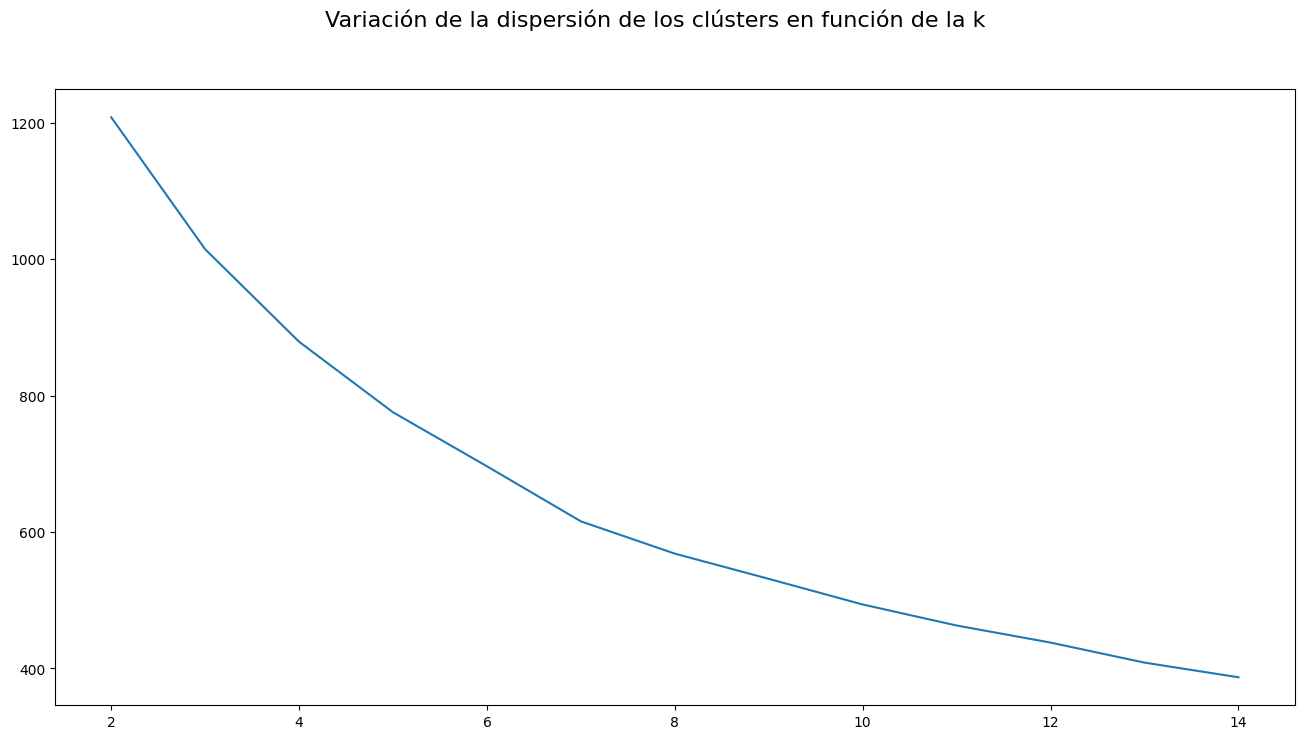

In [45]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()
x_values = list(sse.keys())
y_values = list(sse.values())
ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

## Doble comprobación

In [46]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(df_preprocessed)
  sse.append(kmeans.inertia_)

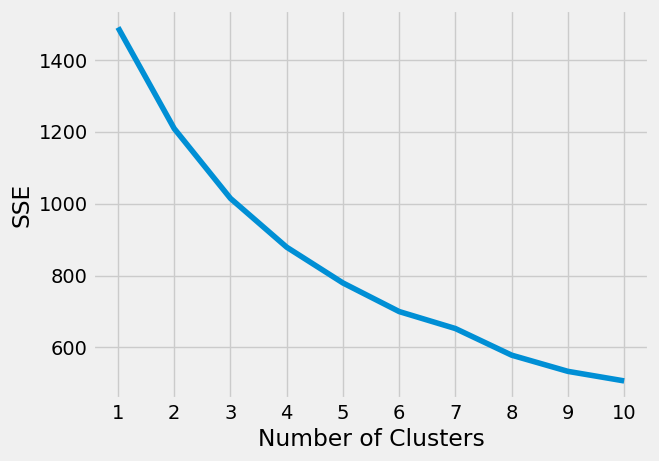

In [47]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [48]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

# Model fit

In [49]:
clustering = KMeans(n_clusters = 7 , random_state = 42) #Decidimos agrupar con 7 clústers ya que hemos visto en el gráfico que también podia ser una buena opción

In [50]:
clustering.fit(df_cluster)

KMeans(n_clusters=7, random_state=42)

In [51]:
clustering.cluster_centers_

array([[5.37375638e+00, 5.04963799e+00, 5.00778008e+00, 3.68511411e+01,
        2.00703423e+03, 2.13109647e+03, 4.66055965e+03, 2.83918738e+04,
        1.34953216e+03, 2.71577282e+02, 2.33992842e+03],
       [9.48644667e+00, 8.79178852e+00, 7.86666667e+00, 2.87200000e+02,
        3.15110000e+03, 1.28118000e+04, 9.45365333e+04, 6.11583213e+05,
        5.92300000e+02, 2.37866667e+02, 2.23711000e+04],
       [7.95220000e+00, 7.49108917e+00, 6.72649573e+00, 1.44286325e+02,
        2.81570085e+03, 1.21651154e+04, 3.29558162e+04, 1.97204297e+05,
        6.01307692e+02, 2.57777778e+02, 9.56946154e+03],
       [2.17600000e+00, 2.07100000e+00, 3.00000000e+00, 6.47000000e+02,
        2.27373675e-13, 0.00000000e+00, 4.33660000e+05, 8.84578570e+05,
        8.48333333e+01, 1.36000000e+02, 8.28481667e+04],
       [3.88200000e+00, 3.65512774e+00, 9.50000000e+00, 1.83200000e+03,
        0.00000000e+00, 0.00000000e+00, 6.25391000e+05, 1.64256325e+06,
        4.60750000e+02, 2.19000000e+02, 1.21726000e+

In [52]:
folder_path = "..\models"
file_name = "model_cluster.pkl"
file_path = os.path.join(folder_path, file_name)

# Asegúrate de que la carpeta exista; si no, créala.
os.makedirs(folder_path, exist_ok=True)

# Guarda el modelo en el archivo especificado.
try:
    with open(file_path, "wb") as file:
        pickle.dump(clustering, file)
    print("Model saved successfully at:", file_path)
except Exception as e:
    print("Error:", e)

Model saved successfully at: ..\models\model_cluster.pkl


In [53]:
labels = clustering.predict(df_cluster)

In [54]:
df_cluster['cluster_id'] = labels

In [55]:
df_cluster.shape

(3049, 12)

In [56]:
df_cluster

,max_price,mean_price,nr_cambios_precio,total_ventas,ventas_category_accesories,ventas_category_home,ventas_category_supermarket,total_revenue,semanas_sin_ventas,semanas_consecutivas_ventas,ventas_ultimo_anio,cluster_id
item,,,,,,,,,,,,
ACCESORIES_1_001,12.7414,11.470706,5,13,4093.0,0.0,0.0,45037.9230,1562,273.0,1779,0
ACCESORIES_1_002,5.2801,5.276746,3,36,5059.0,0.0,0.0,26708.0758,843,273.0,1026,0
ACCESORIES_1_003,7.9401,3.947629,4,16,1435.0,0.0,0.0,5656.3437,2081,273.0,883,0
ACCESORIES_1_004,6.1712,5.977661,4,82,39175.0,0.0,0.0,235347.8358,239,271.0,6348,2
ACCESORIES_1_005,4.0964,3.838264,8,42,14621.0,0.0,0.0,55670.1292,612,252.0,3464,0
...,...,...,...,...,...,...,...,...,...,...,...,...
SUPERMARKET_3_823,3.5760,3.345153,8,97,0.0,0.0,15388.0,50854.0440,1331,271.0,4319,0
SUPERMARKET_3_824,3.2160,3.026768,6,28,0.0,0.0,8325.0,25414.5600,967,273.0,285,0
SUPERMARKET_3_825,5.2560,4.933888,7,58,0.0,0.0,13526.0,65787.5640,844,269.0,3039,5


In [57]:
df_cluster = pd.merge(df_cluster, ventas_ultimo_mes, on = "item")
df_cluster = pd.merge(df_cluster, ventas_ultimo_tres_meses, on = "item")
df_cluster = pd.merge(df_cluster, ventas_ultimo_seis_meses, on = "item")
df_cluster = pd.merge(df_cluster, features_id_event, on = "item")

## Revisar organización clúster

In [58]:
pca = PCA(2)

In [59]:
df_centroides = pca.fit_transform(df_preprocessed)
u_labels = np.unique(labels)
centroids = clustering.cluster_centers_
df_centroides_array = np.array(df_centroides)

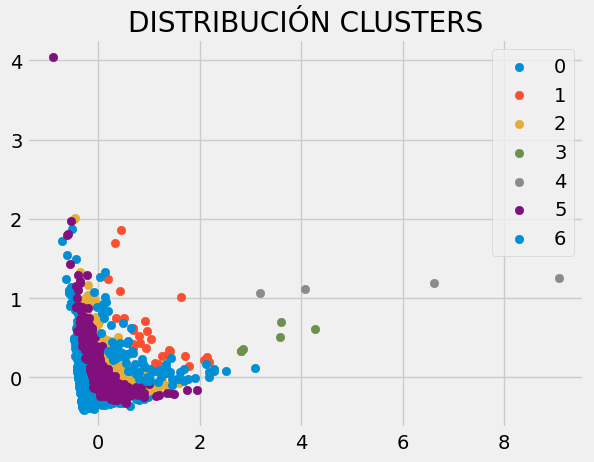

In [60]:
for i in u_labels:
    plt.scatter(df_centroides_array[labels == i , 0] , df_centroides_array[labels == i , 1] , label = i)
# plt.scatter(centroids[:,0] , centroids[:,1] , s = 90, color = 'k')
plt.title('DISTRIBUCIÓN CLUSTERS')
plt.legend()
plt.show()

# Clúster Final

In [61]:
df_mean= round(df_cluster.groupby('cluster_id').mean(),1)
df_mean.insert(0,'num. items',df_cluster.groupby('cluster_id').cluster_id.count())
df_mean.insert(1,'% items sb. total',100*df_cluster.groupby('cluster_id').cluster_id.count()/df_cluster.shape[0])
df_mean = df_mean.T
df_mean.rename(columns = {
    0:'Productos menos vendidos',
    1:'Productos home con mayor rotación',
    2:'Produtos Top ingresos, con mayor rotación y más vendidos en eventos',
    3:'Productos home más caros',
    4:'Productos home y accesorios con precio medio y más semanas consecutivas en ventas',
    5:'Productos accesorios más caros',
    6:'Productos Supermarket con menos continuidad de ventas',
},inplace=True)
df_mean.style.format("{:20,.2f}").background_gradient(axis=1, cmap='Blues')

cluster_id,Productos menos vendidos,Productos home con mayor rotación,"Produtos Top ingresos, con mayor rotación y más vendidos en eventos",Productos home más caros,Productos home y accesorios con precio medio y más semanas consecutivas en ventas,Productos accesorios más caros,Productos Supermarket con menos continuidad de ventas
num. items,"1,926.00",30.00,234.00,6.00,4.00,764.00,85.00
% items sb. total,63.17,0.98,7.67,0.20,0.13,25.06,2.79
max_price,5.40,9.50,8.00,2.20,3.90,6.70,7.10
mean_price,5.10,8.80,7.50,2.10,3.70,6.10,6.60
nr_cambios_precio,5.00,7.90,6.70,3.00,9.50,6.40,6.80
total_ventas,36.80,287.20,144.30,647.00,"1,832.00",86.90,341.30
ventas_category_accesories,"2,009.10","3,151.10","2,815.70",0.00,0.00,"1,881.70",755.40
ventas_category_home,"2,133.30","12,811.80","12,165.10",0.00,0.00,"8,110.80","11,109.10"
ventas_category_supermarket,"4,644.30","94,536.50","32,955.80","433,660.00","625,391.00","16,743.30","90,610.70"
total_revenue,"28,360.50","611,583.20","197,204.30","884,578.60","1,642,563.30","91,357.10","354,837.20"


In [62]:
df_cluster[['cluster_id']]

,cluster_id
item,
ACCESORIES_1_001,0
ACCESORIES_1_002,0
ACCESORIES_1_003,0
ACCESORIES_1_004,2
ACCESORIES_1_005,0
...,...
SUPERMARKET_3_823,0
SUPERMARKET_3_824,0
SUPERMARKET_3_825,5


In [63]:
df_cluster

,max_price,mean_price,nr_cambios_precio,total_ventas,ventas_category_accesories,ventas_category_home,ventas_category_supermarket,total_revenue,semanas_sin_ventas,semanas_consecutivas_ventas,ventas_ultimo_anio,cluster_id,ventas_ultimo_mes,ventas_ultimo_tres_meses,ventas_ultimo_seis_meses,media_ventas_event,total_revenue_event,mean_price_event
item,,,,,,,,,,,,,,,,,,
ACCESORIES_1_001,12.7414,11.470706,5,13,4093.0,0.0,0.0,45037.9230,1562,273.0,1779,0,145,461,900,1.596154,4562.2990,11.450482
ACCESORIES_1_002,5.2801,5.276746,3,36,5059.0,0.0,0.0,26708.0758,843,273.0,1026,0,69,220,505,1.719231,2357.5846,5.270023
ACCESORIES_1_003,7.9401,3.947629,4,16,1435.0,0.0,0.0,5656.3437,2081,273.0,883,0,83,226,483,0.561538,576.7146,3.939716
ACCESORIES_1_004,6.1712,5.977661,4,82,39175.0,0.0,0.0,235347.8358,239,271.0,6348,2,448,1394,2854,14.096154,22027.7925,5.984488
ACCESORIES_1_005,4.0964,3.838264,8,42,14621.0,0.0,0.0,55670.1292,612,252.0,3464,0,259,862,1743,5.042308,4993.9106,3.819197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUPERMARKET_3_823,3.5760,3.345153,8,97,0.0,0.0,15388.0,50854.0440,1331,271.0,4319,0,142,737,1829,4.476923,3780.3600,3.312415
SUPERMARKET_3_824,3.2160,3.026768,6,28,0.0,0.0,8325.0,25414.5600,967,273.0,285,0,140,144,149,2.584615,2040.2760,3.028523
SUPERMARKET_3_825,5.2560,4.933888,7,58,0.0,0.0,13526.0,65787.5640,844,269.0,3039,5,332,897,1471,4.369231,5521.6320,4.935785


In [64]:
df_cluster[df_cluster['cluster_id']==2]

,max_price,mean_price,nr_cambios_precio,total_ventas,ventas_category_accesories,ventas_category_home,ventas_category_supermarket,total_revenue,semanas_sin_ventas,semanas_consecutivas_ventas,ventas_ultimo_anio,cluster_id,ventas_ultimo_mes,ventas_ultimo_tres_meses,ventas_ultimo_seis_meses,media_ventas_event,total_revenue_event,mean_price_event
item,,,,,,,,,,,,,,,,,,
ACCESORIES_1_004,6.1712,5.977661,4,82,39175.0,0.0,0.0,235347.8358,239,271.0,6348,2,448,1394,2854,14.096154,22027.7925,5.984488
ACCESORIES_1_029,11.9434,11.224394,8,34,18157.0,0.0,0.0,201905.2518,271,272.0,3689,2,326,949,1734,6.865385,19879.3770,11.230520
ACCESORIES_1_037,17.9284,17.146098,6,28,13999.0,0.0,0.0,240007.9696,850,273.0,3368,2,256,826,1568,5.326923,23772.5131,17.152243
ACCESORIES_1_040,17.9284,17.155117,6,59,15700.0,0.0,0.0,269713.3334,965,271.0,4064,2,296,928,1986,6.430769,28757.2733,17.172551
ACCESORIES_1_055,11.9434,11.238786,8,34,20351.0,0.0,0.0,229010.5853,249,273.0,4109,2,325,1010,2026,7.715385,22542.6887,11.239012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUPERMARKET_3_772,7.1760,6.358787,8,218,0.0,0.0,40543.0,257359.7160,695,261.0,9735,2,925,2406,4219,11.950000,19796.8800,6.384185
SUPERMARKET_3_782,3.2640,3.116164,6,137,0.0,0.0,65654.0,204103.3200,373,266.0,11747,2,1068,3160,6418,27.742308,22177.8000,3.111600
SUPERMARKET_3_787,2.9760,2.713288,10,247,0.0,0.0,56041.0,145700.8680,870,267.0,6049,2,387,1292,2164,17.696154,12065.5200,2.717631


In [65]:
top_revenue =df[(df['item']=='SUPERMARKET_3_090') | (df['item']=='SUPERMARKET_3_120') | (df['item']=='SUPERMARKET_3_202') | (df['item']=='SUPERMARKET_3_586')]['revenue'].sum()

In [66]:
top_revenue/4

1642563.2519999999

In [67]:
### Descomenta para descargar el CSV con los clusters

# df_cluster.to_csv('df_cluster.csv',index=False)
# webbrowser.open('df_cluster.csv')